<a href="https://colab.research.google.com/github/wycui68/Machine-Learning-Projects/blob/master/HR_Rention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Human Resources Rention Study - Which Employee may quit?

### W Cui, Dec.2020

## Load Employee Dataset

In [ ]:
import pandas as pd

# Uncomment this line if using this notebook locally
#hr_df = pd.read_csv('./data/employee_retention/hr_data.csv') 

file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/hr_data.csv"
hr_df = pd.read_csv(file_name)

# We use the dataframe name followed by a '.head()' to use the head function to 
# preview the first 5 records of the dataframe. If you wanted to preview the first 10, simply 
# put dataframe_name.head(10)
hr_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low


In [ ]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   employee_id            14999 non-null  int64 
 1   number_project         14999 non-null  int64 
 2   average_montly_hours   14999 non-null  int64 
 3   time_spend_company     14999 non-null  int64 
 4   Work_accident          14999 non-null  int64 
 5   left                   14999 non-null  int64 
 6   promotion_last_5years  14999 non-null  int64 
 7   department             14999 non-null  object
 8   salary                 14999 non-null  object
dtypes: int64(7), object(2)
memory usage: 1.0+ MB


In [ ]:
# View which columns are categorical

hr_df.select_dtypes(exclude = ["int", "float"]).columns

Index(['department', 'salary'], dtype='object')

In [ ]:
# Display values in categorical columns
print(hr_df["department"].unique())
print(hr_df["salary"].unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
['low' 'medium' 'high']


In [ ]:
# How many rows in the dataset?
len(hr_df)

14999

In [ ]:
# How many columns in the dataset?
len(hr_df.columns)

9

## Load the Evaluation Dataset

In [9]:
# Uncomment this line if using this notebook locally
#emp_satis_eval = pd.read_excel ('./data/employee_retention/employee_satisfaction_evaluation.xlsx') 

file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/employee_satisfaction_evaluation.xlsx"
emp_satis_eval = pd.read_excel(file_name)

emp_satis_eval.head()

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52


In [10]:
emp_satis_eval.shape

(14999, 3)

## Merge or Join Table

In [12]:
# Using employee_id

main_df = hr_df.set_index("employee_id").join(emp_satis_eval.set_index("EMPLOYEE #"))
main_df = main_df.reset_index()
main_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [15]:
# Any missing values?
main_df[main_df.isnull().any(axis = 1)]

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
18,3794,2,160,3,1,1,1,sales,low,NaN,NaN
19,1140,5,262,5,0,1,0,sales,low,NaN,0.89
33,1230,2,140,3,0,1,0,hr,low,NaN,NaN
53,1340,2,132,3,0,1,0,support,low,NaN,NaN
72,22316,2,149,3,0,1,0,product_mng,high,NaN,NaN
92,1581,2,143,3,0,1,0,sales,low,NaN,NaN
107,17376,2,148,3,0,1,0,accounting,medium,NaN,NaN
120,1739,4,158,4,1,1,0,technical,low,NaN,NaN
137,1847,2,129,3,0,1,0,management,low,NaN,NaN
175,32923,4,164,2,0,1,0,sales,low,NaN,NaN


In [16]:
main_df.isnull().sum()

employee_id               0
number_project            0
average_montly_hours      0
time_spend_company        0
Work_accident             0
left                      0
promotion_last_5years     0
department                0
salary                    0
satisfaction_level       27
last_evaluation          27
dtype: int64

In [17]:
main_df.describe()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14972.000000,14972.000000
mean,45424.627575,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.612830,0.716125
std,25915.900127,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.248714,0.171138
min,1003.000000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.090000,0.360000
25%,22872.500000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.440000,0.560000
50%,45448.000000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.640000,0.720000
75%,67480.500000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.820000,0.870000
max,99815.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
main_df.fillna(main_df.mean(), inplace = True)
main_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [20]:
# Check if the missing values are filled with the mean values
#main_df[main_df.employee_id == 3794]
# Another way to locate
main_df.loc[main_df["employee_id"] == 3794]

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
18,3794,2,160,3,1,1,1,sales,low,0.61283,0.716125


In [22]:
# Remove employee ID
main_df_final = main_df.drop(columns = "employee_id")
main_df_final.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,2,157,3,0,1,0,sales,low,0.38,0.53
1,5,262,6,0,1,0,sales,medium,0.80,0.86
2,7,272,4,0,1,0,sales,medium,0.11,0.88
3,5,223,5,0,1,0,sales,low,0.72,0.87
4,2,159,3,0,1,0,sales,low,0.37,0.52


In [24]:
main_df_final.groupby("department").sum()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,4683,248119,4256,164,273,3,758.17283,879.452250
RandD,3033,158030,2650,134,121,27,487.80000,560.446125
accounting,2934,154292,2702,96,204,14,446.68283,550.706125
hr,2701,146828,2480,89,215,15,442.53566,524.006125
management,2432,126787,2711,103,91,69,391.76566,456.234499
marketing,3164,171073,3063,138,203,43,530.62283,613.946125
product_mng,3434,180369,3135,132,198,0,559.19566,644.662250
sales,15634,831773,14631,587,1014,100,2543.77981,2938.236749
support,8479,447490,7563,345,555,20,1377.90849,1611.534499


In [25]:
main_df_final.groupby("department").mean()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445,0.617908,0.716750
RandD,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307,0.619822,0.712130
accounting,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253,0.582377,0.718000
hr,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298,0.598830,0.709075
management,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524,0.621850,0.724182
marketing,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117,0.618442,0.715555
product_mng,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000,0.619951,0.714703
sales,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155,0.614440,0.709719
support,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973,0.618173,0.722985


In [26]:
# 0 -> still here, 1-> left
main_df_final["left"].value_counts()

0    11428
1     3571
Name: left, dtype: int64

## Display Correlation Matrix

No handles with labels found to put in legend.


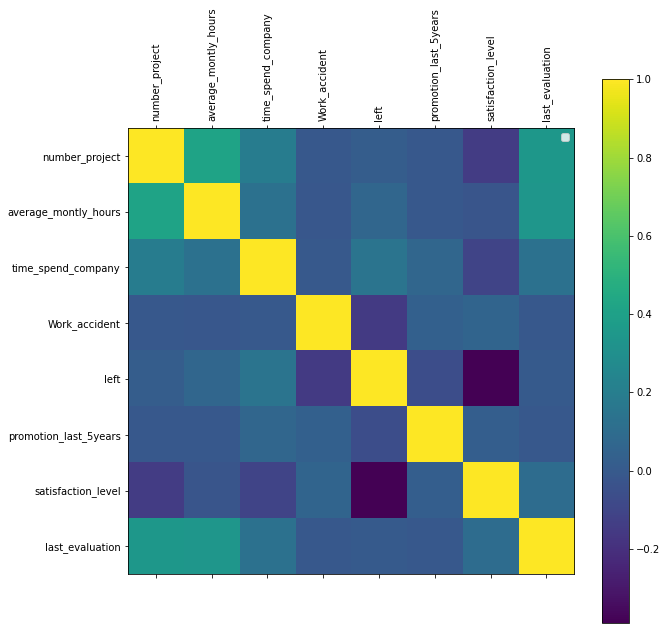

In [27]:
import matplotlib.pyplot as plt

def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.legend()
    cax = ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)
    
plot_corr(main_df_final)

## Prepare Dataset for M.L.

In [28]:
# Perform One Hot Encoding on Categorical Data

categorical = ["department", "salary"]
main_df_final = pd.get_dummies(main_df_final, columns = categorical, drop_first = True)
main_df_final.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,2,157,3,0,1,0,0.38,0.53,0,0,0,0,0,0,1,0,0,1,0
1,5,262,6,0,1,0,0.80,0.86,0,0,0,0,0,0,1,0,0,0,1
2,7,272,4,0,1,0,0.11,0.88,0,0,0,0,0,0,1,0,0,0,1
3,5,223,5,0,1,0,0.72,0.87,0,0,0,0,0,0,1,0,0,1,0
4,2,159,3,0,1,0,0.37,0.52,0,0,0,0,0,0,1,0,0,1,0


In [29]:
# How many columns?
len(main_df_final.columns)

19

In [32]:
# How many employees in the dataset have left?

len(main_df_final[main_df_final["left"] == 1])

3571

In [33]:
from sklearn.model_selection import train_test_split

# We remove the label values from our training data
X = main_df_final.drop(['left'],axis=1).values

# We assigned those label values to our Y dataset
y = main_df_final['left'].values

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [35]:
# Normalize data

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [36]:
df_train = pd.DataFrame(X_train)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.961189,-0.264871,-1.024187,-0.408588,-0.148322,1.478011,0.178440,-0.235572,-0.230346,-0.225257,-0.207153,-0.245760,-0.251804,1.630786,-0.420578,-0.473982,1.019526,-0.865087
1,0.961189,0.333635,1.015058,-0.408588,-0.148322,0.276715,0.997647,-0.235572,-0.230346,-0.225257,-0.207153,-0.245760,-0.251804,1.630786,-0.420578,-0.473982,1.019526,-0.865087
2,1.772339,1.131643,0.335310,-0.408588,-0.148322,-2.045791,1.173191,-0.235572,-0.230346,-0.225257,-0.207153,-0.245760,-0.251804,-0.613201,-0.420578,2.109785,1.019526,-0.865087
3,-0.661112,0.313685,-1.024187,-0.408588,-0.148322,0.236672,-0.991855,4.244989,-0.230346,-0.225257,-0.207153,-0.245760,-0.251804,-0.613201,-0.420578,-0.473982,-0.980848,-0.865087
4,-0.661112,0.433386,4.413799,-0.408588,-0.148322,-0.323933,1.582795,-0.235572,-0.230346,-0.225257,-0.207153,4.069012,-0.251804,-0.613201,-0.420578,-0.473982,1.019526,-0.865087


In [37]:
df_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04
mean,-4.736451e-16,8.434269e-17,1.244837e-16,8.700853e-16,6.344154e-16,3.074390e-14,2.943196e-14,-1.545308e-15,9.853005e-16,-1.493215e-15,6.055786e-16,8.288499e-16,-1.031062e-15,-1.596336e-16,-1.818190e-15,3.414208e-16,6.543538e-17,2.778571e-16
std,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00
min,-1.472262e+00,-2.100289e+00,-1.024187e+00,-4.085885e-01,-1.483220e-01,-2.085834e+00,-2.103636e+00,-2.355719e-01,-2.303458e-01,-2.252567e-01,-2.071533e-01,-2.457599e-01,-2.518040e-01,-6.132012e-01,-4.205782e-01,-4.739819e-01,-9.808482e-01,-8.650875e-01
25%,-6.611117e-01,-9.032772e-01,-3.444385e-01,-4.085885e-01,-1.483220e-01,-6.843216e-01,-9.333405e-01,-2.355719e-01,-2.303458e-01,-2.252567e-01,-2.071533e-01,-2.457599e-01,-2.518040e-01,-6.132012e-01,-4.205782e-01,-4.739819e-01,-9.808482e-01,-8.650875e-01
50%,1.500384e-01,-2.546838e-02,-3.444385e-01,-4.085885e-01,-1.483220e-01,1.165424e-01,6.141063e-02,-2.355719e-01,-2.303458e-01,-2.252567e-01,-2.071533e-01,-2.457599e-01,-2.518040e-01,-6.132012e-01,-4.205782e-01,-4.739819e-01,-9.808482e-01,-8.650875e-01
75%,9.611885e-01,8.722906e-01,3.353096e-01,-4.085885e-01,-1.483220e-01,8.172985e-01,8.806174e-01,-2.355719e-01,-2.303458e-01,-2.252567e-01,-2.071533e-01,-2.457599e-01,-2.518040e-01,1.630786e+00,-4.205782e-01,-4.739819e-01,1.019526e+00,1.155952e+00
max,2.583489e+00,2.169054e+00,4.413799e+00,2.447450e+00,6.742088e+00,1.558098e+00,1.641309e+00,4.244989e+00,4.341299e+00,4.439379e+00,4.827343e+00,4.069012e+00,3.971343e+00,1.630786e+00,2.377679e+00,2.109785e+00,1.019526e+00,1.155952e+00


## Train a Logistic Regression Model

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy 78.18%
[[3190  243]
 [ 739  328]]
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      3433
           1       0.57      0.31      0.40      1067

    accuracy                           0.78      4500
   macro avg       0.69      0.62      0.63      4500
weighted avg       0.76      0.78      0.76      4500



## Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

model = RandomForestClassifier()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
score = model.score(X_test, y_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy 98.76%
[[3423   10]
 [  46 1021]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3433
           1       0.99      0.96      0.97      1067

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500



In [51]:
main_df_final.drop(['left'],axis=1).columns

Index(['number_project', 'average_montly_hours', 'time_spend_company',
       'Work_accident', 'promotion_last_5years', 'satisfaction_level',
       'last_evaluation', 'department_RandD', 'department_accounting',
       'department_hr', 'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical', 'salary_low', 'salary_medium'],
      dtype='object')

## Can deep learning make a difference?

In [40]:
%tensorflow_version 2.x 

In [42]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(9, kernel_initializer = "uniform", activation = "relu", input_dim=18))
model.add(Dense(1, kernel_initializer = "uniform", activation = "sigmoid"))

model.compile(optimizer= "adam",loss = "binary_crossentropy",metrics = ["accuracy"])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 9)                 171       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 10        
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [43]:
batch_size = 10
epochs = 25

history = model.fit(X_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/25
1050/1050 [==============================] - 3s 2ms/step - loss: 0.5429 - accuracy: 0.7584 - val_loss: 0.3160 - val_accuracy: 0.8238
Epoch 2/25
1050/1050 [==============================] - 1s 1ms/step - loss: 0.2864 - accuracy: 0.8428 - val_loss: 0.2510 - val_accuracy: 0.8491
Epoch 3/25
1050/1050 [==============================] - 1s 1ms/step - loss: 0.2319 - accuracy: 0.8848 - val_loss: 0.2243 - val_accuracy: 0.9378
Epoch 4/25
1050/1050 [==============================] - 1s 1ms/step - loss: 0.2112 - accuracy: 0.9472 - val_loss: 0.2066 - val_accuracy: 0.9460
Epoch 5/25
1050/1050 [==============================] - 1s 1ms/step - loss: 0.1951 - accuracy: 0.9530 - val_loss: 0.1956 - val_accuracy: 0.9527
Epoch 6/25
1050/1050 [==============================] - 1s 1ms/step - loss: 0.1781 - accuracy: 0.9566 - val_loss: 0.1882 - val_accuracy: 0.9536
Epoch 7/25
1050/1050 [==============================] - 1s 1ms/step - loss: 0.1761 - accuracy: 0.9552 - val_loss: 0.1820 - val_accuracy:

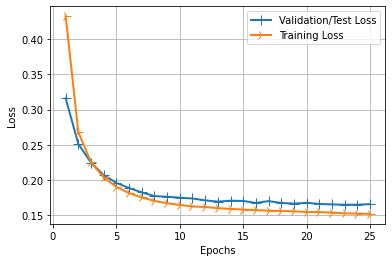

In [44]:
# Plotting our loss charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

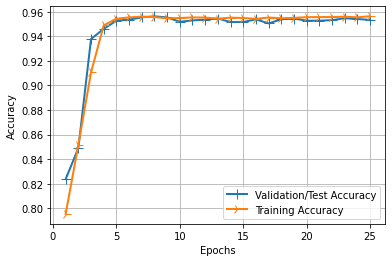

In [45]:
# Plotting our accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [46]:
predictions = model.predict(X_test)
predictions = (predictions > 0.5)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[3328  105]
 [ 105  962]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3433
           1       0.90      0.90      0.90      1067

    accuracy                           0.95      4500
   macro avg       0.94      0.94      0.94      4500
weighted avg       0.95      0.95      0.95      4500



## A deeper model

In [47]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

model2 = Sequential()

# Hidden Layer 1
model2.add(Dense(270, activation='relu', input_dim=18, kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.3, noise_shape=None, seed=None))

# Hidden Layer 1
model2.add(Dense(180, activation='relu', input_dim=18, kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.3, noise_shape=None, seed=None))

# Hidden Layer 2
model2.add(Dense(90, activation = 'relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3, noise_shape=None, seed=None))

model2.add(Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 270)               5130      
_________________________________________________________________
dropout (Dropout)            (None, 270)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 180)               48780     
_________________________________________________________________
dropout_1 (Dropout)          (None, 180)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 90)                16290     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 91        
Total params: 70,291
Trainable params: 70,291
Non-trainable params: 0
__________________________________________________

In [48]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [49]:
batch_size = 10
epochs = 25

history = model2.fit(X_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/25
1050/1050 [==============================] - 3s 3ms/step - loss: 1.2600 - accuracy: 0.8686 - val_loss: 0.2894 - val_accuracy: 0.9402
Epoch 2/25
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2774 - accuracy: 0.9413 - val_loss: 0.2607 - val_accuracy: 0.9462
Epoch 3/25
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2624 - accuracy: 0.9427 - val_loss: 0.2583 - val_accuracy: 0.9382
Epoch 4/25
1050/1050 [==============================] - 3s 2ms/step - loss: 0.2603 - accuracy: 0.9382 - val_loss: 0.2391 - val_accuracy: 0.9480
Epoch 5/25
1050/1050 [==============================] - 3s 2ms/step - loss: 0.2474 - accuracy: 0.9462 - val_loss: 0.2328 - val_accuracy: 0.9480
Epoch 6/25
1050/1050 [==============================] - 3s 2ms/step - loss: 0.2489 - accuracy: 0.9438 - val_loss: 0.2373 - val_accuracy: 0.9480
Epoch 7/25
1050/1050 [==============================] - 3s 2ms/step - loss: 0.2415 - accuracy: 0.9457 - val_loss: 0.2294 - val_accuracy:

In [50]:
predictions = model2.predict(X_test)
predictions = (predictions > 0.5)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[3304  129]
 [  97  970]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      3433
           1       0.88      0.91      0.90      1067

    accuracy                           0.95      4500
   macro avg       0.93      0.94      0.93      4500
weighted avg       0.95      0.95      0.95      4500

